## IC credit default

#### 倒入并可视化数据

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path='/Users/Elaine/Desktop/train_v2.csv'
data=pd.read_csv(path)
data.head()

/Users/Elaine/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (135,204,274,417) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f770,f771,f772,f773,f774,f775,f776,f777,f778,loss
0,1,126,10,0.686842,1100,3,13699,7201.0,4949.0,126.75,...,5,2.14,-1.54,1.18,0.1833,0.7873,1,0,5,0
1,2,121,10,0.782776,1100,3,84645,240.0,1625.0,123.52,...,6,0.54,-0.24,0.13,0.1926,-0.6787,1,0,5,0
2,3,126,10,0.500080,1100,3,83607,1800.0,1527.0,127.76,...,13,2.89,-1.73,1.04,0.2521,0.7258,1,0,5,0
3,4,134,10,0.439874,1100,3,82642,7542.0,1730.0,132.94,...,4,1.29,-0.89,0.66,0.2498,0.7119,1,0,5,0
4,5,109,9,0.502749,2900,4,79124,89.0,491.0,122.72,...,26,6.11,-3.82,2.51,0.2282,-0.5399,0,0,5,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105471 entries, 0 to 105470
Columns: 771 entries, id to loss
dtypes: float64(653), int64(99), object(19)
memory usage: 620.4+ MB


In [4]:
data.shape

(105471, 771)

### 观察到有object类型，要处理 Data cleaning and formatting

In [5]:
data.select_dtypes(include=['object']).head()

,f137,f138,f206,f207,f276,f277,f338,f390,f391,f419,f420,f469,f472,f534,f537,f626,f627,f695,f698
0,8090000000000000,754485076006959972352,3200000000000,38600000000000000,7900000000000000,683091368180479950848,7610000000000,10370164393071999997033054208,13621142007705000132589703585884798976,137000000000,511000000000000,569877634360569973702656,3427303293502300223465356001280,240811094251680005357568,1185103615651699994464937312256,11724173453590999285553430528,16027029142402000396838501389877379072,8700000000000000000,8010000000000000000
1,2250000000000,15300000000000000,392000000000,1690000000000000,92300000000000,2140000000000000000,796594176,5098137566366599989877014528,5366154527659000357778647583412977664,9483264,1593188352,107000000000000000,9894337169928600158208,251470350285930004480,161196782629860003268263936,6391495663130699779035627520,7158933769610900052770065343332745216,5890000000000000000,5030000000000000000
2,186000000000000,6910365323840000000,23700000000000,389000000000000000,10300000000000,69200000000000000,461000000000,26400269714792999161039945728,36117033568522998807722429270944907264,36051866452,63500000000000,313319151143610023936,222812827058929985669562368,116067852739909992448,61668865475731997253959680,36420952401170000260810932224,56027915541865997900093655676589441024,24512111987574001664,19855991371293999104
3,44500000000000000,11225194901267999096832,16098514954,35000000000000,22200000000000,295000000000000000,1330000000000,9333818143939599917454983168,12638526060843999893906772076814925824,5621900678,9380000000000,2641626213765599994052608,24452856014536001129152839155712,202899352692079984640,126293716597939998795235328,15267506423634001098621059072,24362045267421999852972382580757233664,9660000000000000000,6960000000000000000
4,52152926246,108000000000000,442000000000,1870000000000000,3630000000000,23100000000000000,2240000000000,196004669899870011305513451520,428213273484070002013091334592080642048,279000000000,659000000000000,68300000000000,922000000000000000,654000000000000000,89341826582645997305856,238204359524660008028924280832,550170020491249969340152709153269219328,108505460071560003584,94766610066210996224


### 查看missing values

In [6]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [7]:
missing_values_table(data).head(50)

Your selected dataframe has 771 columns.
There are 525 columns that have missing values.


,Missing Values,% of Total Values
f662,18833,17.9
f663,18833,17.9
f159,18736,17.8
f160,18736,17.8
f170,18417,17.5
f169,18417,17.5
f618,18407,17.5
f619,18407,17.5
f331,18067,17.1
f330,18067,17.1


In [8]:
# Statistics for each column
data.describe()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f770,f771,f772,f773,f774,f775,f776,f777,f778,loss
count,105471.000000,105471.000000,105471.000000,105471.000000,105471.000000,105471.000000,105471.000000,105289.000000,105370.000000,105471.000000,...,105471.000000,105471.000000,105471.000000,105471.000000,104407.000000,103946.000000,105471.000000,105471.000000,105471.000000,105471.000000
mean,52736.000000,134.603171,8.246883,0.499066,2678.488874,7.354533,47993.704317,2974.336018,2436.363718,134.555225,...,17.422543,5.800976,-4.246788,3.273059,0.233852,0.014797,0.310246,0.322847,175.951589,0.799585
std,30446.999458,14.725467,1.691535,0.288752,1401.010943,5.151112,35677.136048,2546.551085,2262.950221,13.824682,...,18.548936,6.508555,4.828265,3.766746,0.073578,1.039439,0.462597,0.467567,298.294043,4.321120
min,1.000000,103.000000,1.000000,0.000006,1100.000000,1.000000,0.000000,1.000000,1.000000,106.820000,...,2.000000,0.000000,-43.160000,0.000000,0.000000,-18.439600,0.000000,0.000000,2.000000,0.000000
25%,26368.500000,124.000000,8.000000,0.248950,1500.000000,4.000000,11255.000000,629.000000,746.000000,124.290000,...,5.000000,1.480000,-5.700000,0.740000,0.198400,-0.704275,0.000000,0.000000,19.000000,0.000000
50%,52736.000000,129.000000,9.000000,0.498267,2200.000000,4.000000,76530.000000,2292.000000,1786.000000,128.460000,...,11.000000,3.570000,-2.600000,1.990000,0.251800,0.375400,0.000000,0.000000,40.000000,0.000000
75%,79103.500000,148.000000,9.000000,0.749494,3700.000000,10.000000,80135.000000,4679.000000,3411.000000,149.080000,...,23.000000,7.700000,-1.010000,4.440000,0.283600,0.737100,1.000000,1.000000,104.000000,0.000000
max,105471.000000,176.000000,11.000000,0.999994,7900.000000,17.000000,88565.000000,9968.000000,11541.000000,172.950000,...,168.000000,58.120000,0.000000,34.040000,0.473700,11.092000,1.000000,1.000000,1212.000000,100.000000


In [9]:
data.mean()

id      52736.000000
f1        134.603171
f2          8.246883
f3          0.499066
f4       2678.488874
            ...     
f775        0.014797
f776        0.310246
f777        0.322847
f778      175.951589
loss        0.799585
Length: 758, dtype: float64

In [10]:
## 用mean来填充missing values

data.fillna(data.mean(), inplace=True)

In [11]:
missing_values_table(data).head(50)

Your selected dataframe has 771 columns.
There are 12 columns that have missing values.


,Missing Values,% of Total Values
f206,1291,1.2
f207,1291,1.2
f390,698,0.7
f391,698,0.7
f626,698,0.7
f627,698,0.7
f695,698,0.7
f698,698,0.7
f138,182,0.2
f137,177,0.2


## 为什么还会有missing values？？

In [12]:
data.dropna(inplace=True)
missing_values_table(data).head(50)

Your selected dataframe has 771 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [13]:
data.shape

(103302, 771)

# 把object类型，转换成 float/int，还是说drop比较好？？？

In [14]:
missing_values_table(data).head(50)
data.select_dtypes(include=['object']).head()

Your selected dataframe has 771 columns.
There are 0 columns that have missing values.


,f137,f138,f206,f207,f276,f277,f338,f390,f391,f419,f420,f469,f472,f534,f537,f626,f627,f695,f698
0,8090000000000000,754485076006959972352,3200000000000,38600000000000000,7900000000000000,683091368180479950848,7610000000000,10370164393071999997033054208,13621142007705000132589703585884798976,137000000000,511000000000000,569877634360569973702656,3427303293502300223465356001280,240811094251680005357568,1185103615651699994464937312256,11724173453590999285553430528,16027029142402000396838501389877379072,8700000000000000000,8010000000000000000
1,2250000000000,15300000000000000,392000000000,1690000000000000,92300000000000,2140000000000000000,796594176,5098137566366599989877014528,5366154527659000357778647583412977664,9483264,1593188352,107000000000000000,9894337169928600158208,251470350285930004480,161196782629860003268263936,6391495663130699779035627520,7158933769610900052770065343332745216,5890000000000000000,5030000000000000000
2,186000000000000,6910365323840000000,23700000000000,389000000000000000,10300000000000,69200000000000000,461000000000,26400269714792999161039945728,36117033568522998807722429270944907264,36051866452,63500000000000,313319151143610023936,222812827058929985669562368,116067852739909992448,61668865475731997253959680,36420952401170000260810932224,56027915541865997900093655676589441024,24512111987574001664,19855991371293999104
3,44500000000000000,11225194901267999096832,16098514954,35000000000000,22200000000000,295000000000000000,1330000000000,9333818143939599917454983168,12638526060843999893906772076814925824,5621900678,9380000000000,2641626213765599994052608,24452856014536001129152839155712,202899352692079984640,126293716597939998795235328,15267506423634001098621059072,24362045267421999852972382580757233664,9660000000000000000,6960000000000000000
4,52152926246,108000000000000,442000000000,1870000000000000,3630000000000,23100000000000000,2240000000000,196004669899870011305513451520,428213273484070002013091334592080642048,279000000000,659000000000000,68300000000000,922000000000000000,654000000000000000,89341826582645997305856,238204359524660008028924280832,550170020491249969340152709153269219328,108505460071560003584,94766610066210996224


In [15]:
data.select_dtypes(include=['object']).columns

Index(['f137', 'f138', 'f206', 'f207', 'f276', 'f277', 'f338', 'f390', 'f391',
       'f419', 'f420', 'f469', 'f472', 'f534', 'f537', 'f626', 'f627', 'f695',
       'f698'],
      dtype='object')

In [16]:
for i in data.select_dtypes(include=['object']).columns:
    data.drop(labels=i,axis=1,inplace=True)

### 画图，看看label

Text(0, 0.5, 'Frequency')

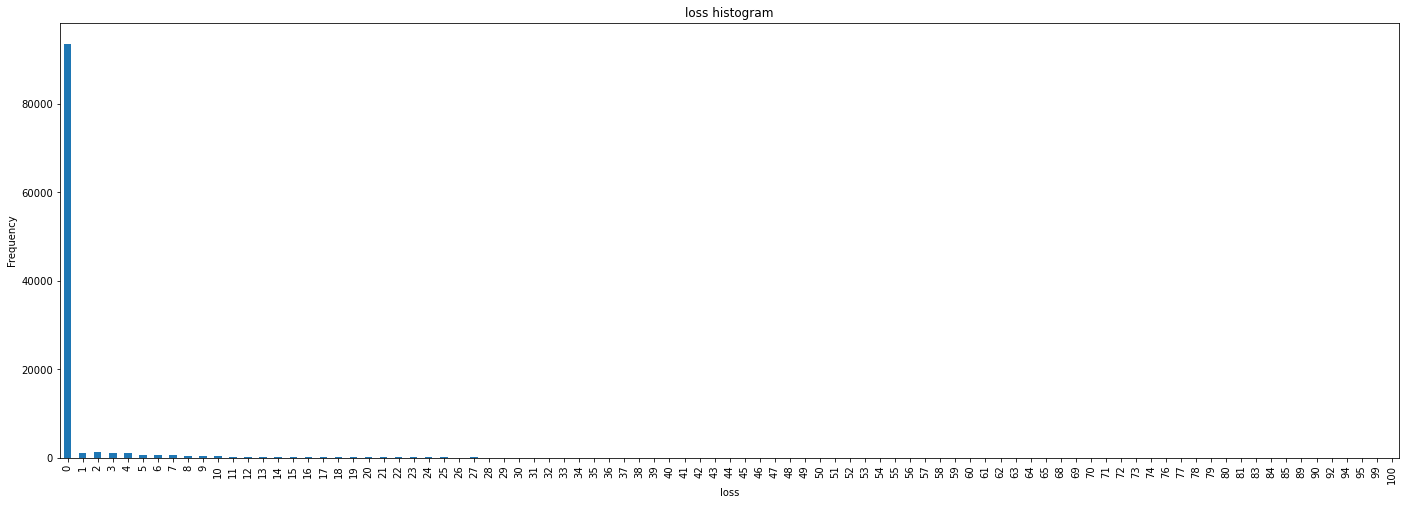

In [17]:
count_classes = pd.value_counts(data['loss'], sort = True).sort_index()
count_classes.plot(kind='bar',figsize=(24,8))
plt.title('loss histogram')
plt.xlabel('loss')
plt.ylabel('Frequency')

## 看出来大部分集中0，部分再后面.

 #### loss 分布差异太大，ml的时候，学不到后面的情况。方案1.undersample  2.oversample

In [20]:
## under sample
X = data.iloc[:,data.columns!='loss'] # 特征（非Calss都是特征）
y = data.iloc[:,data.columns=='loss']


,loss
0,0
1,0
2,0
3,0
4,0
...,...
105466,0
105467,0
105468,0
105469,0


In [34]:
## 我来取loss的样本
number_loss=len(data[data.loss !=0])

In [35]:
number_loss

9642

# 这里为什么要取index，不是直接取值呢？？？？？

In [50]:
#取loss即异常样本index
loss_indices=np.array(data[data.loss !=0].index)## 这里为什么要取index，不是直接取值呢？？？？？
loss_indices

array([     7,     16,     26, ..., 105440, 105456, 105463])

In [51]:
normal_indices=np.array(data[data.loss==0].index)

In [52]:
normal_indices

array([     0,      1,      2, ..., 105468, 105469, 105470])

In [53]:
## 在正常的样本数量 10w里面取9642 

normal_random_indices=np.random.choice(normal_indices,number_loss,replace=False)

In [54]:
normal_random_indices

array([59309, 39105, 30351, ..., 80231, 64812, 94676])

In [57]:
## 拼接样本
under_sample_indices=np.concatenate([loss_indices,normal_random_indices])
under_sample_indices

array([    7,    16,    26, ..., 80231, 64812, 94676])

# 这里有个疑问就是under_sample_indices代表的是feature吧！！！

In [58]:
## 根据index取data
under_sample_data=data.iloc[under_sample_indices,:] ##取所有特征

IndexError: positional indexers are out-of-bounds

# 这里有个问题就是X，和y代表的东西.数组掌握不佳！！

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state =0)
## 整体数据切分,留着做测试
print("原始训练集包含样本数量",len(X_train))
print("原始测试集包含样本数量",len(X_test))
print("原始样本总数",len(X_train)+len(X_test))

## 下采样数据集进行切分
X_train_undersample,X_test_undersample,y_train_undersample,y_test_undersample = train_test_split(X_undersample,y_undersample
                                                                                                ,test_size=0.3
                                                                                                ,random_state=0)
print("下采样训练集样本数量",len(X_train_undersample))

print("下采样测试集样本数量",len(X_test_undersample))

print("下采样样本总数量",len(X_train_undersample)+len(X_test_undersample))

原始训练集包含样本数量 72311
原始测试集包含样本数量 30991
原始样本总数 103302


NameError: name 'X_undersample' is not defined

#  这里有个疑问，就是如何做regularization

In [ ]:
n*R（w）? ### feature太多，做regularization合适么？

In [ ]:
def printing_Kfold_scores(x_train_data,y_train_data):
    fold=KFold(len(y_train_data),5,shuffle=False)
## 定义不同的正则化惩罚力度
   　c_param_range=[0.01,0.1,1,10,100]
## 展示结果表格
    results_table=pd.Dataframe(index=range(len(c_param_range),2),columns = ['C_paramter','Mean recall scores'])
    result_table['C_paramter']=c_param_range
## K-fold表示k折的交叉验证


# 逻辑回归

In [ ]:
Ir = LogisticRegression(C=c_param,penalty='l1')
## 训练模型，注意索引不要给错，训练的时候一定传入training set
Ir.fit(x_train_data.iloc[indices[0],:],y_train_data.iloc[indices[0],:].values.ravel())
## 建好模型，用来验证
y_pred_undersample=Ir.predict(x_train_data.iloc[indices[1],:].values)

### (105471, 771) initial

## 我第一个反应是是不是要标准化下数据